##Анализ роста CPA для рекламодателя "Сигма"
**Цель исследования** - проанализировать рост CPA по рекламным кампаниям "Сигмы" за 4 месяца (с июня по сентябрь 2022), выяснить причину растущего CPA и дать рекомендации по снижению и стабилизации CPA до целевого значения (380 руб).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Откроем файл и проверим данные.

In [2]:
data = pd.read_excel('/content/Задание_стажировка_рекламный аналитик_2023.xlsx', sheet_name='data')
data.head()

,Client,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost,Conversions
0,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.000000,0
1,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,5949,41,1666.844364,0
2,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,cpc_video,none,Retargeting,191,6,40.641915,0
3,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,227,1,45.747407,0
4,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,18,0,0.000000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478 entries, 0 to 10477
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Client                   10478 non-null  object        
 1   Month                    10478 non-null  datetime64[ns]
 2   Category                 10478 non-null  object        
 3   Device                   10478 non-null  object        
 4   Place                    10478 non-null  object        
 5   BannerType               10478 non-null  object        
 6   QueryType (search only)  10478 non-null  object        
 7   TargetingType            10478 non-null  object        
 8   Shows                    10478 non-null  int64         
 9   Clicks                   10478 non-null  int64         
 10  Cost                     10478 non-null  float64       
 11  Conversions              10478 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

In [4]:
data.duplicated().sum()

0

Ограничим данные рекламодателем "Сигма" и периодом с января по сентябрь 2022 года. Посчитаем CPA (cost per action) — разделим сумму затрат на количество целевых действий. Если CPA равен нулю, то целевых действий не было совсем, значит рекламодатель не оплачивает этот расход.

In [5]:
sigma = data.query('Client == "Сигма" and Month >= "2022-01-01"')
sigma['CPA'] = sigma['Cost']/sigma['Conversions']
sigma['CPA'] = sigma['CPA'].round(2)
pd.options.mode.use_inf_as_na = True
sigma['CPA'] = sigma['CPA'].fillna(0)

Посмотрим на разброс данных в столбце CPA.

count       716.000000
mean       2572.741858
std       19084.112948
min           0.000000
25%           0.000000
50%         158.475000
75%         679.342500
max      384782.040000
Name: CPA, dtype: float64

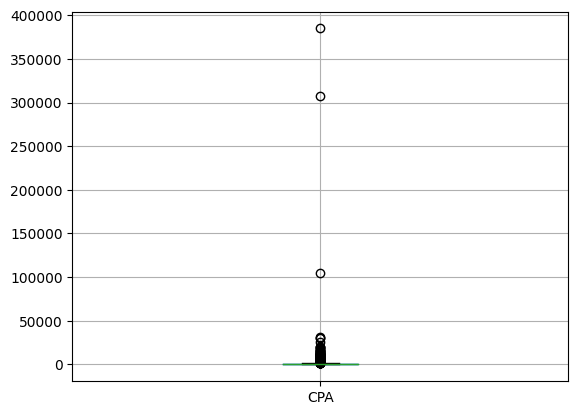

In [6]:
sigma.boxplot('CPA')
sigma['CPA'].describe()

Очевиден большой разброс данных: при медиане 158 значение среднего 2572, а стандартное отклонение 19084.

Разброс в четвертом квартиле от 679 до 384782.
Отсечем все данные по CPA выше 50000.

In [7]:
sigma.query('CPA > 50000')

,Client,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost,Conversions,CPA
1650,Сигма,2022-08-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,472245,3589,1.042509e+05,1,104250.95
1840,Сигма,2022-09-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,text,none,Phrase,18018208,154258,2.766184e+06,9,307353.77
1841,Сигма,2022-09-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,text,none,Retargeting,3256585,24554,7.695641e+05,2,384782.04


Мы видим три позиции с очень большим CPA, который сильно влияет на общий массив данных: для РКО в августе и сентябре в мобильной версии для площадки Networks типа text и image_ad было получено очень мало целевых визитов в расчете на расходы рекламодателя. CPA для типа text в сентябре более 300000 руб., а для типа image_ad в августе — более 100000 руб.

Посмотрим на распределение данных без выбросов по CPA. Ограничим его 50000 рублей.

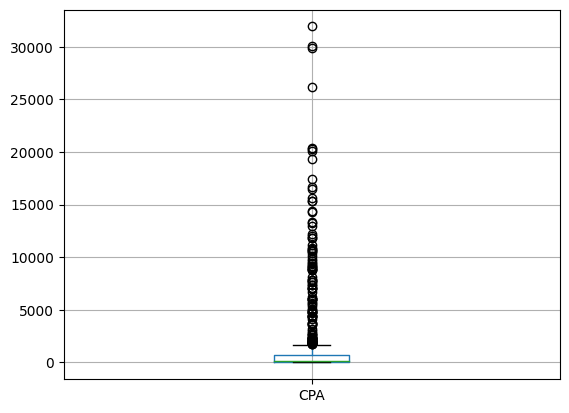

count      713.000000
mean      1466.614881
std       3788.502555
min          0.000000
25%          0.000000
50%        156.130000
75%        674.380000
max      31927.370000
Name: CPA, dtype: float64

In [8]:
sigma_red = sigma.query('CPA <= 50000')
sigma_red.boxplot(column='CPA') # построим диаграмму размаха
plt.show()
sigma_red['CPA'].describe()

In [9]:
np.percentile(sigma_red['CPA'], [66, 67])

array([368.418 , 384.2448])

Среднее значение сразу уменьшилось, как и стандартное отклонение. Под требуемый порог CPA попадает только 66% сокращенных данных. То есть 34% рекламных кампаний выходят дороже ожидаемого.

Построим графики изменения CPA по месяцам для исходных и сокращенных данных.

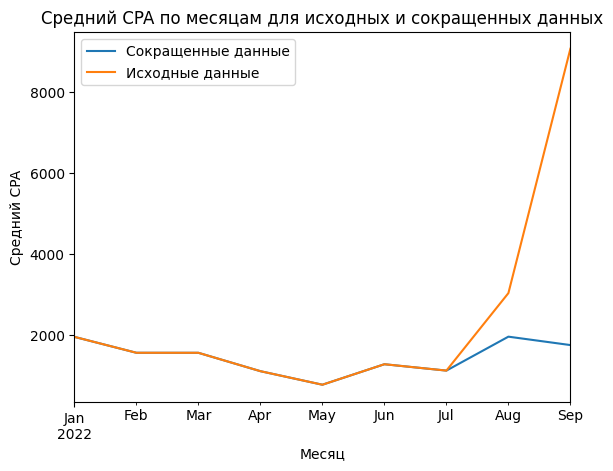

In [10]:
sigma_red.groupby('Month')['CPA'].mean().plot(kind = 'line')
sigma.groupby('Month')['CPA'].mean().plot(kind = 'line')
plt.xlabel("Месяц")
plt.ylabel("Средний CPA")
plt.title('Средний CPA по месяцам для исходных и сокращенных данных')
plt.legend(['Сокращенные данные', 'Исходные данные'])
plt.show()

Из графика видно, что до июля CPA был одинаковым, но все равно высоким - выше, чем требуемый показатель в 380 рублей. Затем для данных с исключенными выбросами CPA медленно растет от июля к августу, а потом так же медленно уменьшается к сентябрю. А CPA для полных данных увеличился с 1500 до 3000 с июля по август, а затем очень резко вырос до 9000 к сентябрю.

Посмотрим на распределение по категориям.

<Axes: title={'center': 'Средний CPA по месяцам в разбивке по категории'}, xlabel='Month'>

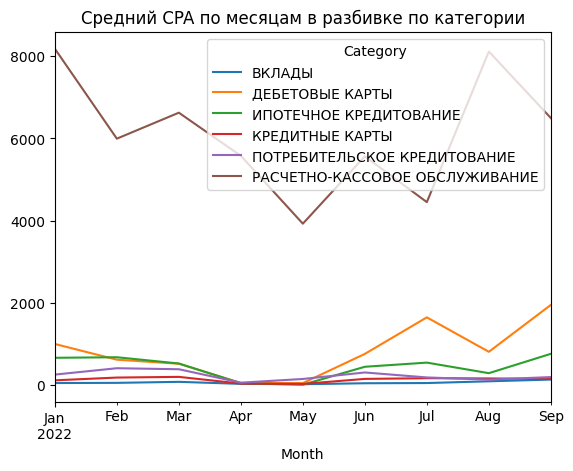

In [11]:
# от категории
(
    sigma_red.pivot_table(index='Month', columns = 'Category', values='CPA', aggfunc='mean')
    .sort_values(by='Month')
    .plot(title='Средний CPA по месяцам в разбивке по категории', legend=True)
)

<Axes: title={'center': 'Средний CPA по месяцам в разбивке по типу устройства'}, xlabel='Month'>

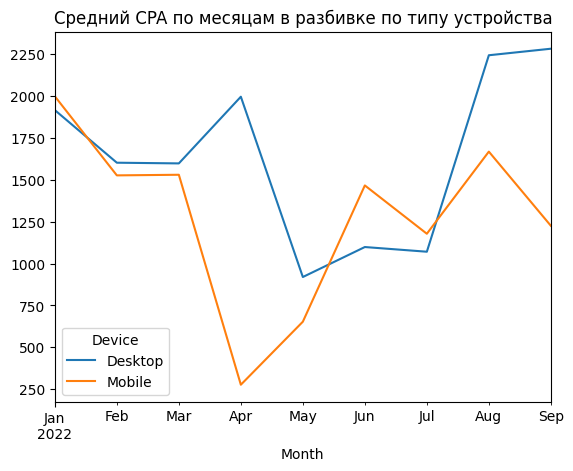

In [12]:
# от типа устройства
(
    sigma_red.pivot_table(index='Month', columns = 'Device', values='CPA', aggfunc='mean')
    .sort_values(by='Month')
    .plot(title='Средний CPA по месяцам в разбивке по типу устройства', legend=True)
)

<Axes: title={'center': 'Средний CPA по месяцам в разбивке по площадке'}, xlabel='Month'>

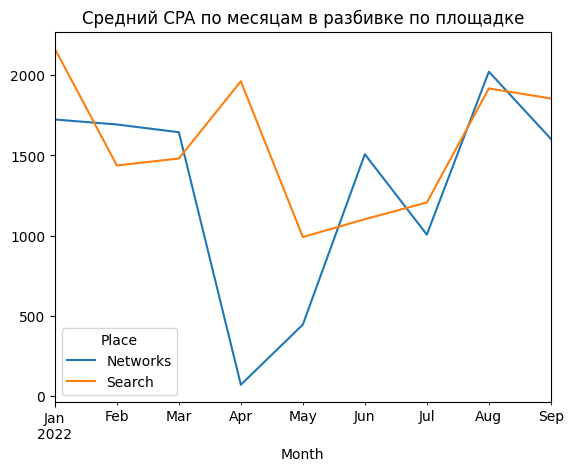

In [13]:
# от площадки
(
    sigma_red.pivot_table(index='Month', columns = 'Place', values='CPA', aggfunc='mean')
    .sort_values(by='Month')
    .plot(title='Средний CPA по месяцам в разбивке по площадке', legend=True)
)

<Axes: title={'center': 'Средний CPA по месяцам в разбивке по типу объявления'}, xlabel='Month'>

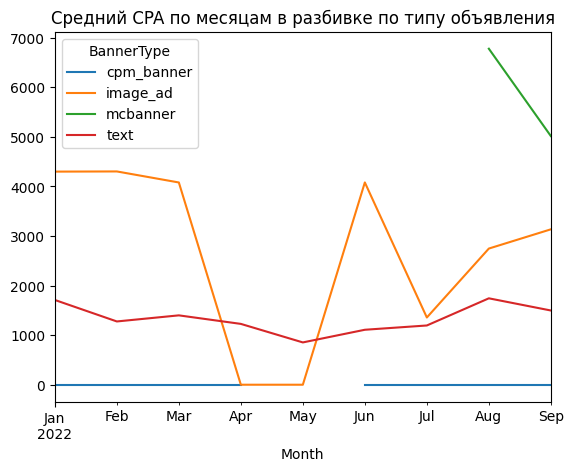

In [14]:
# от типа объявления
(
    sigma_red.pivot_table(index='Month', columns = 'BannerType', values='CPA', aggfunc='mean')
    .sort_values(by='Month')
    .plot(title='Средний CPA по месяцам в разбивке по типу объявления', legend=True)
)

<Axes: title={'center': 'Средний CPA по месяцам в разбивке по типу запроса'}, xlabel='Month'>

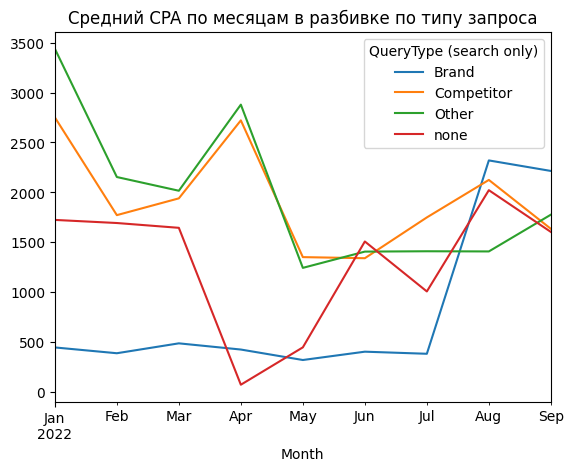

In [15]:
# от типа запроса
(
    sigma_red.pivot_table(index='Month', columns = 'QueryType (search only)', values='CPA', aggfunc='mean')
    .sort_values(by='Month')
    .plot(title='Средний CPA по месяцам в разбивке по типу запроса', legend=True)
)

<Axes: title={'center': 'Средний CPA по месяцам в разбивке по типу таргетинга'}, xlabel='Month'>

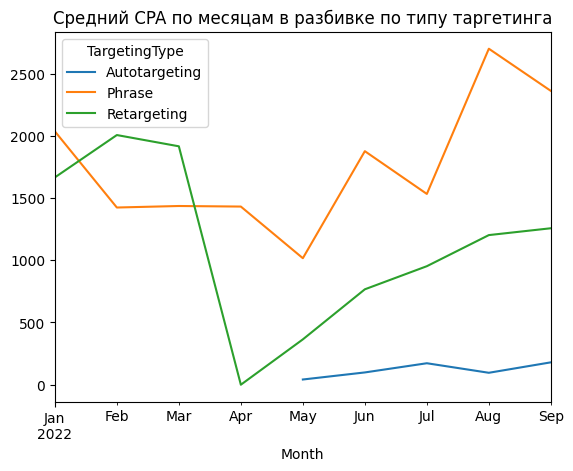

In [16]:
# от типа таргетинга
(
    sigma_red.pivot_table(index='Month', columns = 'TargetingType', values='CPA', aggfunc='mean')
    .sort_values(by='Month')
    .plot(title='Средний CPA по месяцам в разбивке по типу таргетинга', legend=True)
)

Особенно выделяется РКО (средний CPA не падает ниже 4448 рублей во всех периодах) среди категорий, а также image_ad и mcbanner среди других типов объявлений.

Проверим также корреляцию между конверсией, расходами и CPA.

In [17]:
display(sigma_red[['Cost', 'Conversions', 'CPA']].corr())

,Cost,Conversions,CPA
Cost,1.000000,0.635028,0.226838
Conversions,0.635028,1.000000,-0.093696
CPA,0.226838,-0.093696,1.000000


Зависимости CPA от других показателей практически нет.

Рассмотрим распределение CPA для категорий в зависимости от остальных характеристик, тк именно этот график дает самый высокий показатель, достигающий 8000 рублей.

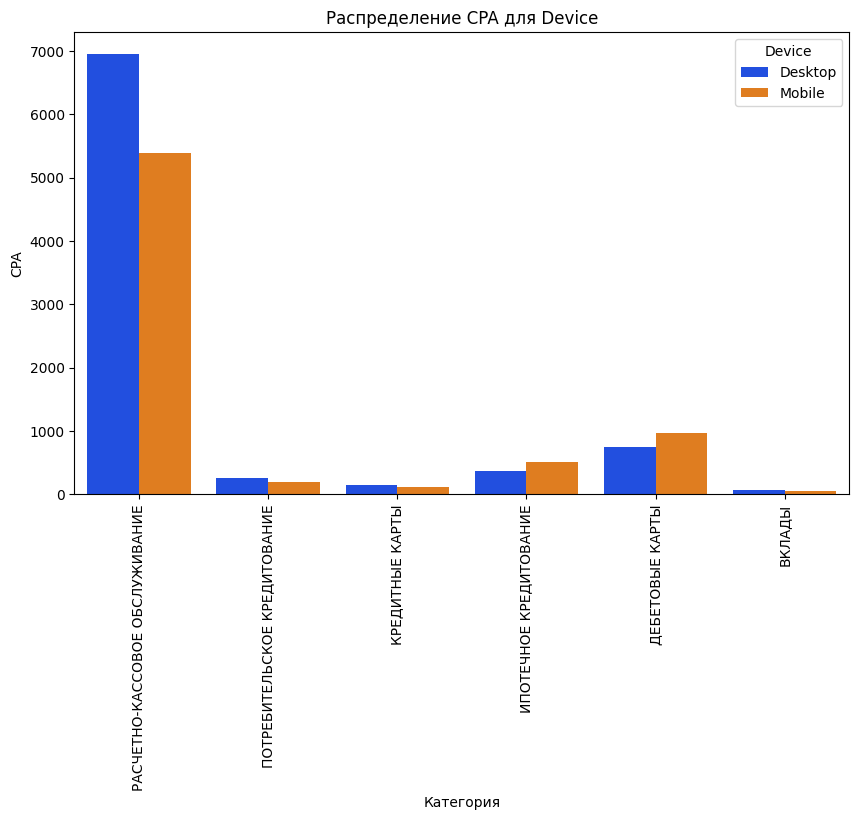

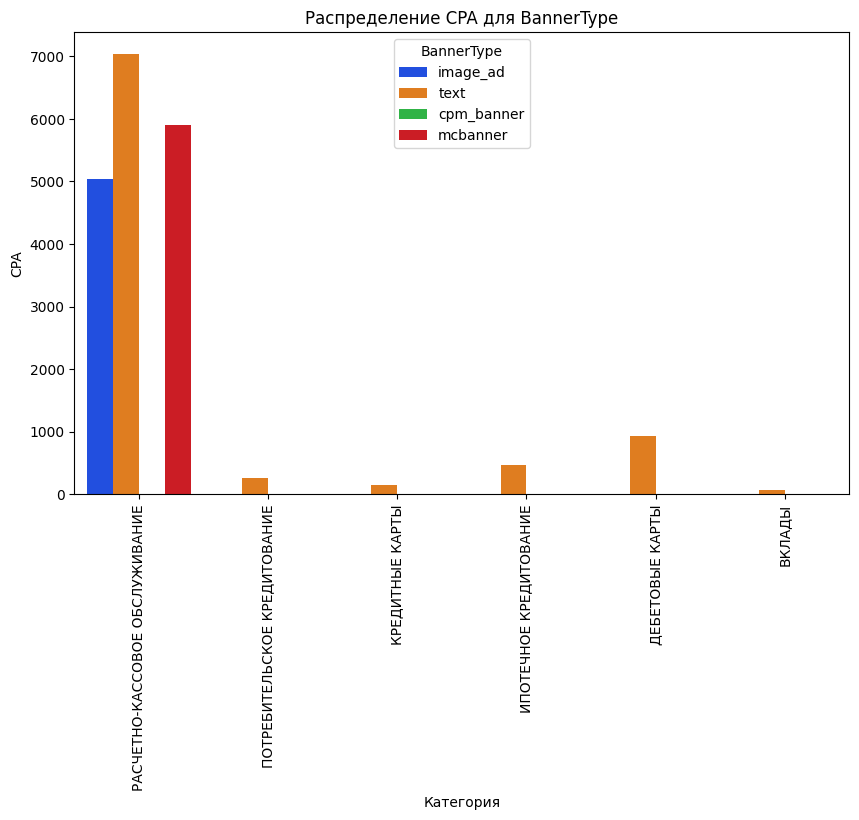

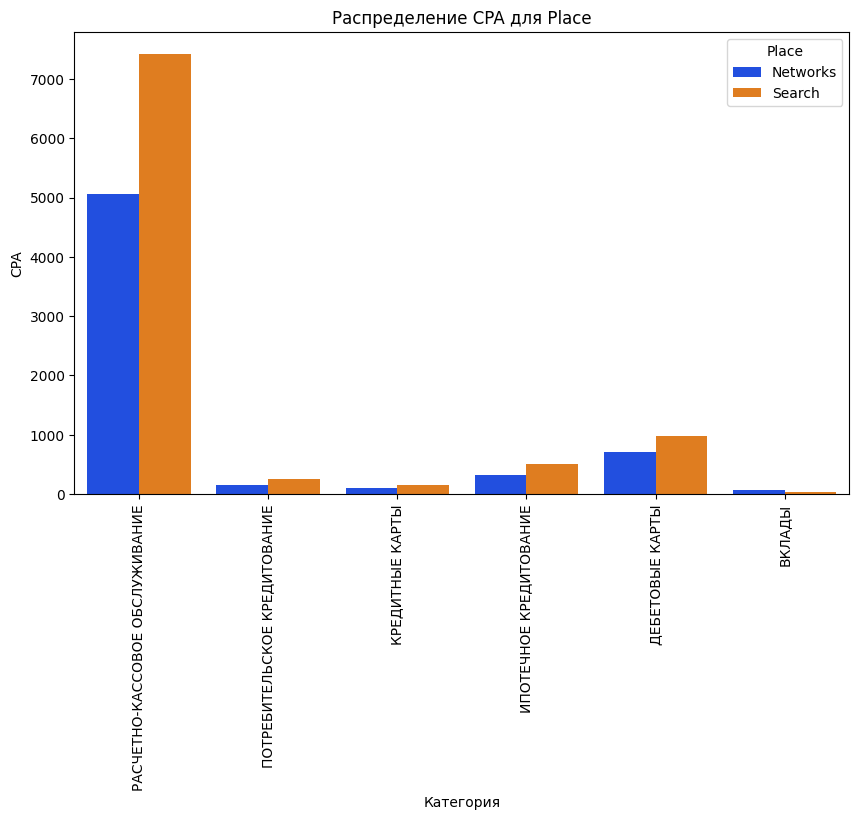

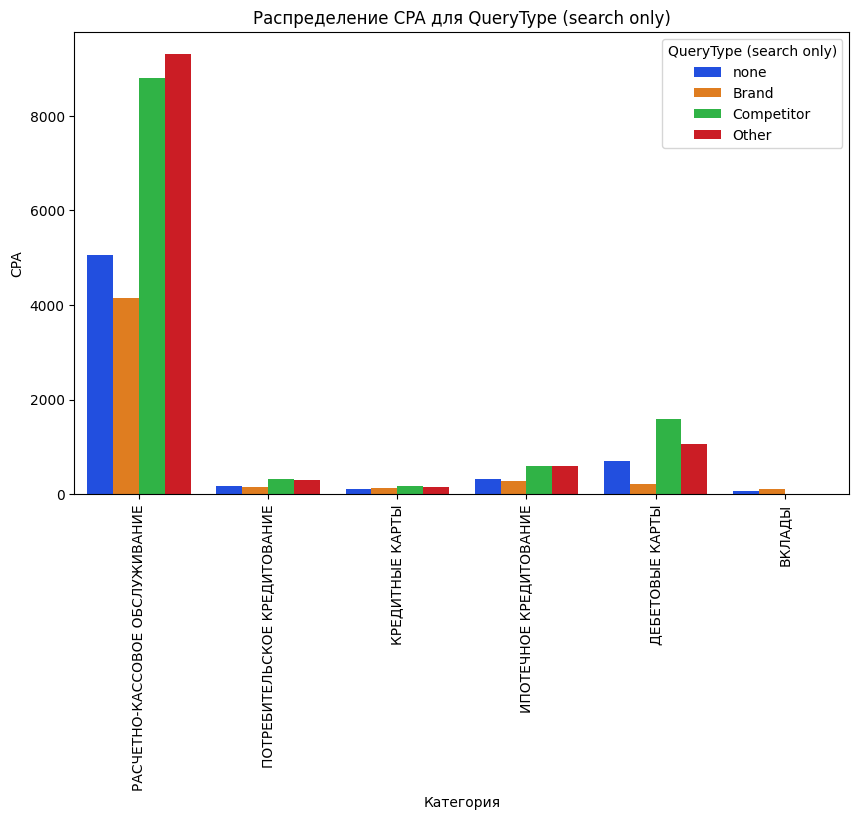

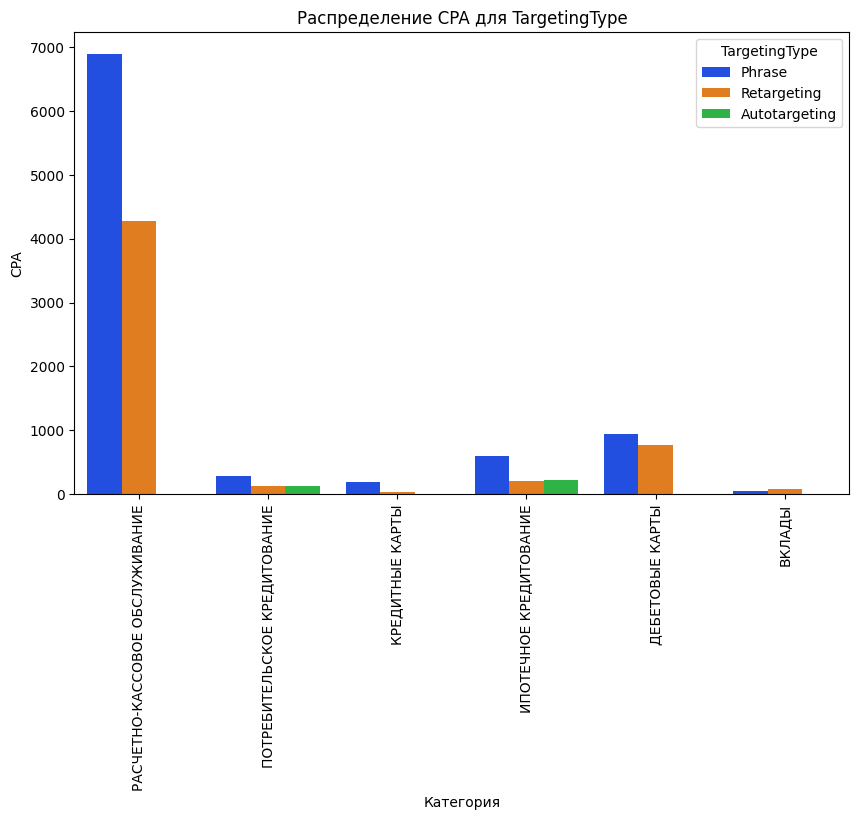

In [18]:
columns = ['Device', 'BannerType', 'Place', 'QueryType (search only)', 'TargetingType']
for col in columns:
    plt.figure(
    figsize=(10, 6)
    )
    sns.set_palette('deep')
    ax = sns.barplot(data=sigma_red, x='Category', y='CPA', palette='bright', errorbar=None, hue=col)
    plt.xticks(rotation=90)
    plt.title ('Распределение CPA для ' + col)
    ax.set_xlabel('Категория')
    ax.set_ylabel('CPA') 
    plt.show()

Для категории РКО, показывающей самый высокий CPA, есть заметные различия:
- По типу устройства - CPA для Desktop в 1,3 раза выше, чем для мобильной версии.
- Примерно такое же различие для типа объявления text, которое дает в 1,4 раза больший CPA, чем image_ad. 
- Такое же распределение для типа площадки: Search выше Networks.
- Типы запроса Competitor и Other дают выше CPA примерно в 1,8 раз, чем none и Brand.
- Для типа таргетинга Phrase CPA выше в 1,6 раз, чем для Retargeting.


Рассмотрим распределение CPA в разрезе категорий и типа объявления (как дающие самый высокий средний CPA) по месяцам.

In [19]:
sigma.pivot_table(index=['Category', 'BannerType'], columns='Month', values='CPA', aggfunc='mean').round(2)

Month                                      2022-01-01  2022-02-01  2022-03-01  \
Category                       BannerType                                       
ВКЛАДЫ                         cpm_banner         NaN         NaN         NaN   
                               image_ad           NaN        0.00         NaN   
                               text             41.23       49.88       70.17   
ДЕБЕТОВЫЕ КАРТЫ                cpm_banner         NaN         NaN         NaN   
                               image_ad          0.00        0.00         NaN   
                               text           1091.88      670.83      511.65   
ИПОТЕЧНОЕ КРЕДИТОВАНИЕ         cpm_banner         NaN        0.00        0.00   
                               image_ad           NaN         NaN        0.00   
                               text            656.05      736.37      672.20   
КРЕДИТНЫЕ КАРТЫ                cpm_banner        0.00        0.00        0.00   
                               image_ad          0.00        0.00        0.00   
                               text            128.40      209.34      229.44   
ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ   cpm_banner         NaN         NaN        0.00   
                               image_ad          1.08        0.00        0.00   
                               mcbanner          0.00         NaN         NaN   
                               text            320.55      442.00      490.29   
РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ cpm_banner         NaN        0.00         NaN   
                               image_ad       8597.36     8604.91     7139.87   
                               mcbanner           NaN         NaN         NaN   
                               text           8020.33     5549.43     6421.78   

Month                                      2022-04-01  2022-05-01  2022-06-01  \
Category                       BannerType                                       
ВКЛАДЫ                         cpm_banner         NaN         NaN         NaN   
                               image_ad           NaN        0.00         NaN   
                               text             20.96       13.45       35.88   
ДЕБЕТОВЫЕ КАРТЫ                cpm_banner         NaN         NaN         NaN   
                               image_ad           NaN         NaN         NaN   
                               text             41.72       39.12      750.80   
ИПОТЕЧНОЕ КРЕДИТОВАНИЕ         cpm_banner         NaN         NaN         NaN   
                               image_ad           NaN         NaN         NaN   
                               text             36.38        0.00      437.39   
КРЕДИТНЫЕ КАРТЫ                cpm_banner        0.00         NaN        0.00   
                               image_ad           NaN        0.00        0.00   
                               text             30.02       21.35      163.76   
ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ   cpm_banner        0.00         NaN        0.00   
                               image_ad           NaN        0.00        0.00   
                               mcbanner           NaN         NaN         NaN   
                               text             60.07      149.08      364.73   
РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ cpm_banner         NaN         NaN        0.00   
                               image_ad          0.00        0.00     7140.90   
                               mcbanner           NaN         NaN         NaN   
                               text           7434.26     5492.76     6046.81   

Month                                      2022-07-01  2022-08-01  2022-09-01  
Category                       BannerType                                      
ВКЛАДЫ                         cpm_banner         NaN        0.00         NaN  
                               image_ad           NaN         NaN        0.00  
                               text             41.09       92.62      153.82  
ДЕБЕТОВЫЕ КАРТЫ                cpm

Проверим распределение количества рекламных кампаний в разрезе категорий и типа объявления по месяцам.

In [20]:
sigma.pivot_table(index=['Category', 'BannerType'], columns='Month', values='Cost', aggfunc='count').round(2)

Month                                      2022-01-01  2022-02-01  2022-03-01  \
Category                       BannerType                                       
ВКЛАДЫ                         cpm_banner         NaN         NaN         NaN   
                               image_ad           NaN         1.0         NaN   
                               text              10.0        10.0        10.0   
ДЕБЕТОВЫЕ КАРТЫ                cpm_banner         NaN         NaN         NaN   
                               image_ad           1.0         1.0         NaN   
                               text              10.0        10.0        10.0   
ИПОТЕЧНОЕ КРЕДИТОВАНИЕ         cpm_banner         NaN         1.0         2.0   
                               image_ad           NaN         NaN         1.0   
                               text              10.0        10.0        10.0   
КРЕДИТНЫЕ КАРТЫ                cpm_banner         1.0         1.0         1.0   
                               image_ad           1.0         1.0         1.0   
                               text              10.0        10.0        10.0   
ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ   cpm_banner         NaN         NaN         2.0   
                               image_ad           2.0         1.0         1.0   
                               mcbanner           1.0         NaN         NaN   
                               text              10.0        10.0        10.0   
РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ cpm_banner         NaN         1.0         NaN   
                               image_ad           4.0         4.0         4.0   
                               mcbanner           NaN         NaN         NaN   
                               text              10.0        10.0        10.0   

Month                                      2022-04-01  2022-05-01  2022-06-01  \
Category                       BannerType                                       
ВКЛАДЫ                         cpm_banner         NaN         NaN         NaN   
                               image_ad           NaN         1.0         NaN   
                               text               8.0         9.0         9.0   
ДЕБЕТОВЫЕ КАРТЫ                cpm_banner         NaN         NaN         NaN   
                               image_ad           NaN         NaN         NaN   
                               text               9.0         9.0        13.0   
ИПОТЕЧНОЕ КРЕДИТОВАНИЕ         cpm_banner         NaN         NaN         NaN   
                               image_ad           NaN         NaN         NaN   
                               text              10.0        13.0        14.0   
КРЕДИТНЫЕ КАРТЫ                cpm_banner         1.0         NaN         1.0   
                               image_ad           NaN         1.0         1.0   
                               text              10.0        11.0        13.0   
ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ   cpm_banner         2.0         NaN         2.0   
                               image_ad           NaN         1.0         2.0   
                               mcbanner           NaN         NaN         NaN   
                               text              10.0        16.0        18.0   
РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ cpm_banner         NaN         NaN         2.0   
                               image_ad           3.0         4.0         4.0   
                               mcbanner           NaN         NaN         NaN   
                               text               9.0        10.0        10.0   

Month                                      2022-07-01  2022-08-01  2022-09-01  
Category                       BannerType                                      
ВКЛАДЫ                         cpm_banner         NaN         1.0         NaN  
                               image_ad           NaN         NaN         2.0  
                               text              10.0         9.0         9.0  
ДЕБЕТОВЫЕ КАРТЫ                cpm

Проверим распределение среднего объема затрат на рекламные кампании в разрезе категорий и типа объявления по месяцам.

In [21]:
sigma.pivot_table(index=['Category', 'BannerType'], columns='Month', values='Cost', aggfunc='sum').round(2)

Month                                      2022-01-01  2022-02-01  \
Category                       BannerType                           
ВКЛАДЫ                         cpm_banner         NaN         NaN   
                               image_ad           NaN        0.00   
                               text         333952.71   421064.88   
ДЕБЕТОВЫЕ КАРТЫ                cpm_banner         NaN         NaN   
                               image_ad          0.00        0.00   
                               text         724098.82   919369.75   
ИПОТЕЧНОЕ КРЕДИТОВАНИЕ         cpm_banner         NaN        0.00   
                               image_ad           NaN         NaN   
                               text        2064704.23  3383770.29   
КРЕДИТНЫЕ КАРТЫ                cpm_banner        0.00        0.00   
                               image_ad          0.00        0.00   
                               text        1309881.42  2258006.16   
ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ   cpm_banner         NaN         NaN   
                               image_ad         55.36        0.00   
                               mcbanner          0.00         NaN   
                               text        3942570.74  7967243.64   
РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ cpm_banner         NaN        0.00   
                               image_ad     174653.35   165697.42   
                               mcbanner           NaN         NaN   
                               text        6572604.84  7608200.74   

Month                                       2022-03-01  2022-04-01  \
Category                       BannerType                            
ВКЛАДЫ                         cpm_banner          NaN         NaN   
                               image_ad            NaN         NaN   
                               text          883011.15   337831.70   
ДЕБЕТОВЫЕ КАРТЫ                cpm_banner          NaN         NaN   
                               image_ad            NaN         NaN   
                               text          801096.47   430808.56   
ИПОТЕЧНОЕ КРЕДИТОВАНИЕ         cpm_banner         0.00         NaN   
                               image_ad           0.00         NaN   
                               text         3299780.06     5030.95   
КРЕДИТНЫЕ КАРТЫ                cpm_banner         0.00        0.00   
                               image_ad           0.00         NaN   
                               text         4353376.00   304227.89   
ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ   cpm_banner         0.00        0.00   
                               image_ad           0.00         NaN   
                               mcbanner            NaN         NaN   
                               text        16249075.12  3021967.66   
РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ cpm_banner          NaN         NaN   
                               image_ad      159200.47      365.70   
                               mcbanner            NaN         NaN   
                               text         8935247.83  2135713.95   

Month                                      2022-05-01   2022-06-01  \
Category                       BannerType                            
ВКЛАДЫ                         cpm_banner         NaN          NaN   
                               image_ad          0.00          NaN   
                               text         330900.68    322632.65   
ДЕБЕТОВЫЕ КАРТЫ                cpm_banner         NaN          NaN   
                               image_ad           NaN          NaN   
                               text         641389.14    853400.43   
ИПОТЕЧНОЕ КРЕДИТОВАНИЕ         cpm_banner         NaN          NaN   
                               image_ad           NaN          NaN   
                               text              0.00   2224373.85   
КРЕДИТНЫЕ КАРТЫ                cpm_banner         NaN         0.00   
                               image_ad          0.00         0.00   
                              

На данном этапе можно сделать следующие выводы:

- увеличение CPA для категории "Дебетовые карты" типа text в июне-сентябре, но оно заметно только из-за падения этого показателя в апреле-мае. При этом средний объем затрат на рекламу увеличился в два раза в июле и августе, а в сентябре вновь упал в два раза (а CPA соответсвенно вырос);
- CPA в категории "Ипотечное кредитование" типа text также упал в апреле-мае (в мае он равен нулю, затраты тоже), затем менялся соответвенно изменению затрат на рекламу;
- категория "РКО" отличается самым высоким показателем CPA. Минимальный показатель - 1695 рублей в июле для типа image_ad, самый высокий - 75704 рубля для типа text в сентябре. Вероятнее всего это связано с более чем двукратным падением среднего объема затрат на рекламу для этого типа в данной категории и тем, что два самых крупных показателя CPA (307 тысяч и 384 тысячи рублей) относятся к этой категории/типу/периоду. Более того, размер CPA не зависит от типа объявления — CPA для image_ad примерно равен этому показателю типа text и внедренному в августе типу mc_banner. При этом объем затрат не сильно влияет на показатель CPA — так, в феврале и мае CPA для типа text составил около 5,5 тысяч рублей, а объем средний объем расходов на рекламу в феврале составил около 760 тысяч рублей, а в мае 295 тысяч рублей.
- Для всех категорий заметно сильное падение CPA в апреле и мае 2022 года, после которого следует рост до прежних показателей. Кроме того в этот период падают также средние расходы на рекламу.


Проверим причину падения CPA в апреле и мае — посмотрим на относительные показатели изменения расходов и конверсии.

<Axes: xlabel='Month'>

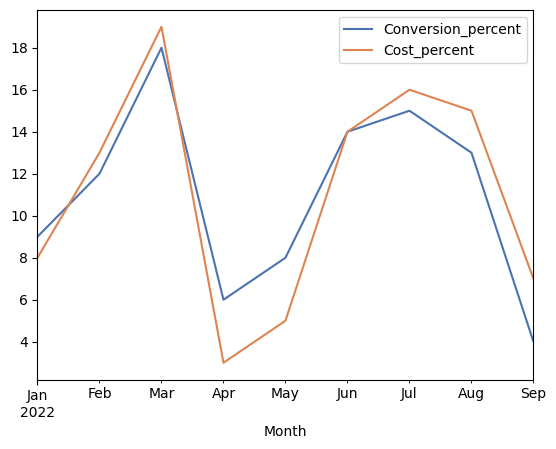

In [22]:
sigma['Conversion_percent'] = 100* sigma['Conversions']/sigma['Conversions'].sum()
sigma['Cost_percent'] = 100 * sigma['Cost']/sigma['Cost'].sum()

# процентное соотношение по каждому месяцу
sigma.groupby('Month')['Conversion_percent', 'Cost_percent'].sum().round().plot()

Падение CPA в апреле и мае 2022 года вызвано тем, что несмотря на резкое сокращение расходов на рекламу на 16%, показатели по целевым визитам упали не так стремительно - на 12%. После этого в июне корреляция между показателями расходов и конверсии вернулась на прежний уровень, увеличились расходы на рекламу и конверсия, и соответственно CPA вернулся на уровень марта.


Посмотрим на распределение трат на кампании в зависимости от категории.

In [23]:
sigma.groupby('Category')['Cost'].sum().round().to_frame().sort_values(by='Cost', ascending=False)

,Cost
Category,
РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,70163801.0
ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,61610013.0
ИПОТЕЧНОЕ КРЕДИТОВАНИЕ,20161232.0
КРЕДИТНЫЕ КАРТЫ,15057392.0
ДЕБЕТОВЫЕ КАРТЫ,7898690.0
ВКЛАДЫ,3735112.0


Также посмотрим на распределение среднего CPA для данных без выбросов.

In [24]:
sigma_red.groupby('Category')['CPA'].mean().to_frame().sort_values(by='CPA', ascending=False).round()

,CPA
Category,
РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,6190.0
ДЕБЕТОВЫЕ КАРТЫ,861.0
ИПОТЕЧНОЕ КРЕДИТОВАНИЕ,439.0
ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,217.0
КРЕДИТНЫЕ КАРТЫ,127.0
ВКЛАДЫ,55.0


Предварительный анализ говорит о том, что:
- При самом крупном объеме трат на РКО по сравнению с другими категориями, эта группа показывает самый высокий CPA, значение которого не всегда коррелирует с объемами затрат на рекламу. 
- Категория "Вклады" показывает самый низкий показатель CPA, имея самые низкие расходы на рекламу.
- CPA в категориях "Вклады", "Кредитные карты" и "Потребительское кредитование" находится ниже целевого значения, в категории "Ипотечное кредитование" он немного его выше. Для "Дебетовых карт" CPA выше целевого в 2,2 раза.



In [25]:
(
    sigma.query('Category == "ИПОТЕЧНОЕ КРЕДИТОВАНИЕ" or Category == "ДЕБЕТОВЫЕ КАРТЫ"')
    .pivot_table(index=['Category', 'Device'], values=['CPA', 'Cost'], aggfunc='mean').round(2)
)

CPA       Cost
Category               Device                    
ДЕБЕТОВЫЕ КАРТЫ        Desktop  741.72   71047.87
                       Mobile   968.91   84686.64
ИПОТЕЧНОЕ КРЕДИТОВАНИЕ Desktop  368.35  182633.49
                       Mobile   513.14  149795.86

In [26]:
(
    sigma.query('Category == "ИПОТЕЧНОЕ КРЕДИТОВАНИЕ" or Category == "ДЕБЕТОВЫЕ КАРТЫ"')
    .pivot_table(index=['Category', 'TargetingType'], values=['CPA', 'Cost'], aggfunc='mean').round(2)
)

CPA       Cost
Category               TargetingType                   
ДЕБЕТОВЫЕ КАРТЫ        Autotargeting    0.00       0.00
                       Phrase         941.29  102412.98
                       Retargeting    770.85    5765.17
ИПОТЕЧНОЕ КРЕДИТОВАНИЕ Autotargeting  219.50    8962.86
                       Phrase         589.74  273029.54
                       Retargeting    198.92     261.03

В категории "Дебетовые карты" расходы на мобильную версию выше, но CPA тоже выше. Возможно, стоит перенаправить бюджет на Desktop.
В обеих категориях больше всего бюджета тратится на тип таргетинга Phrase, но у него же и самый высокий CPA, выгоднее всего для "Ипоточного кредитования" - Autotargeting.

##Выводы:
- Самые высокие расходы рекламодателя относятся к категории "Расчетно-кассовое обслуживание". CPA в этой категории значительно выше этого показателя в других категориях. Средний CPA до скачка в августе-сентябре составляет 6190 рублей (в 16,3 раза больше целевого значения). Кроме того, РКО - лидер по сумме затрат на рекламу.
- Категория "Вклады" показывает самый низкий показатель CPA, имея самые низкие расходы на рекламу.
- CPA в категориях "Вклады", "Кредитные карты" и "Потребительское кредитование" находится ниже целевого значения, в категории "Ипотечное кредитование" он немного его выше. Для "Дебетовых карт" CPA выше целевого в 2,2 раза.
- Для всех категорий заметно сильное падение CPA в апреле и мае 2022 года, после которого следует рост до прежних показателей. Кроме того в этот период падают также средние расходы на рекламу. Это вызвано тем, что несмотря на резкое сокращение расходов на рекламу на 16%, показатели по целевым визитам упали не так стремительно - на 12%. После этого в июне корреляция между показателями расходов и конверсии вернулась на прежний уровень, увеличились расходы на рекламу и конверсия, и соответственно CPA вернулся на уровень марта.
- Резкий скачок CPA в августе и сентябре 2022 года дали три рекламные кампании с CPA в 104 тысячи рублей (август, РКО, image_ad), 307 тысяч и 384 тысячи рублей (сентябрь, РКО, text). При удалении этих строк из данных CPA показывает лишь небольшое увеличение в августе за счет введения нового типа объявлений для РКО mcbanner с CPA в 6778 рублей — типичным для этой категории.


##Рекомендации:
- Отказаться от больших расходов на рекламу для РКО. CPA в этой категории стабильно высокий независимо от изменений суммы бюджета.
- Не стоит направлять большие суммы на единичные рекламные кампании в категории РКО, имеет смысл распределять бюджет между большим количеством кампаний, тестируя различные варианты рекламы для снижения CPA.
- Продолжать вкладывать в рекламу в категориях "Вклады" и "Кредитные карты", в них самый низкий CPA при самых низких затратах.
- В категории "Дебетовые карты" перенаправить бюджет на Desktop вместо мобильной версии, в категории "Ипоточное кредитование" - на Autotargeting.